Pratik Dhumal-012457185
Project Workbook
Alternus Vera 3 Final submission
Covered points in submission 

I have learned and covered below points in my submission.
All of the points are covered with screenshots and brief description.

1. Preprocessing
2. Visualization
3. Lemmatization
4. Stemming
5. Spell Check
6. Dictionary
7. LDA
8. Doc2Vec
9. TF-IDF
10. LDA using TF-IDF 
11. Sentiment analysis 
12. Rating 
13. Naive Bayes Classifier
14. Data enrichment
15. Vectorization 

Factor: Bias
Factor accuracy:0.3


In [1]:
import pandas as pd
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#training data
dfs_train = pd.read_excel("/home/pratik/Desktop/ML_homework/train.xlsx")

In [3]:
#checking
print("Number of Rows and Columns", dfs_train.shape)
print(dfs_train.loc[0])

dfs_train.head(5)

Number of Rows and Columns (10269, 14)
ID                                                              2635.json
label                                                               False
statement               Says the Annies List political group supports ...
subject(s)                                                       abortion
speaker                                                      dwayne-bohac
speaker's job title                                  State representative
state info                                                          Texas
party affiliation                                              republican
barely true counts                                                      0
false counts                                                            1
half true counts                                                        0
mostly true counts                                                      0
pants on fire counts                                                    0

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


Story:
I am choosing Speakers job title as parameter.I am trying to find information that how much job title affects label values.For example if Job title is Senaotor whats the graph of the speakers job title vs label how job title can be used to verify whether speaker is saying the truth or not

In [4]:
X_train=dfs_train["speaker's job title"]
Y_train=dfs_train["label"]

In [5]:
#Exploring data though cross tabulation
CT = pd.crosstab(X_train,Y_train,margins=True)

In [6]:
CT.sort_values('All', ascending=False)

label,False,True,barely-true,half-true,mostly-true,pants-fire,All
speaker's job title,,,,,,,
All,1437,1274,1143,1531,1473,505,7363
President,69,106,56,125,131,8,495
U.S. Senator,66,107,72,105,124,6,480
Governor,75,59,65,93,65,34,391
President-Elect,102,6,48,39,27,52,274
U.S. senator,51,53,37,57,56,9,263
Presidential candidate,29,60,33,56,70,6,254
Former governor,28,30,27,49,28,17,179
U.S. Representative,27,29,38,43,27,8,172


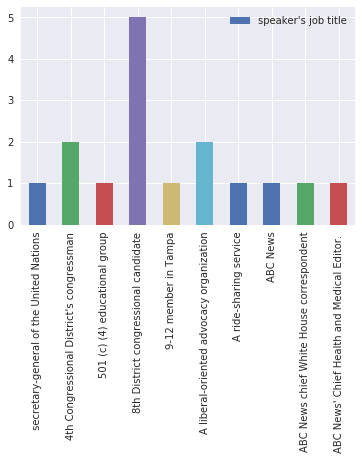

In [7]:
#speakers job title
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = X_train.value_counts().sort_index(ascending=True).head(10).plot('bar', ax=ax, legend=True)

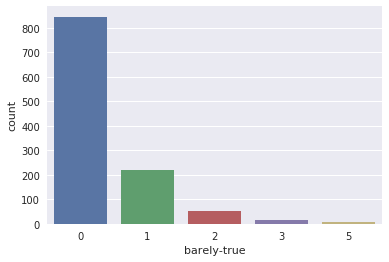

In [8]:

import seaborn as sns
sns.countplot(x="barely-true", data=CT,order=CT["barely-true"].value_counts().iloc[:5].index)
plt.show()

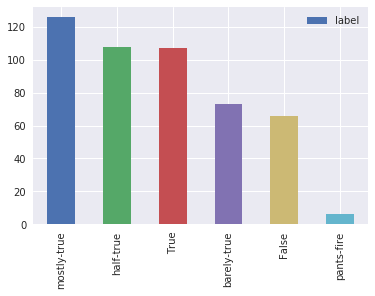

In [9]:
#By changing the value here for column we can check as per job title whats the probability of speaker lying
#This is specific example for U.S. Senator
import numpy as np
values_for_true = np.column_stack([dfs_train[col].str.contains("U.S. Senator") for col in ['speaker\'s job title']])
#print (values_for_true)
unique, counts = np.unique(values_for_true, return_counts=True)
dict(zip(unique, counts))
dfs_train['values_for_true'] = values_for_true
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs_train[dfs_train['values_for_true']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

In [10]:
#dfs_train.plot(x=X_train, y=Y_train, kind="bar")
#purifying data 
X_train
X_train = X_train.replace(np.nan,'No Job Title', regex=True)

In [11]:
X_train
dfs_train


,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,values_for_true
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,False
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,False
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,False
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,NaN
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,NaN
5,12465.json,True,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,False
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,NaN
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",False
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,NaN
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,False


In [12]:
#References/credits
#https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
#Following the above tutorial 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /home/pratik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [14]:
# testing stemmer
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [15]:
#function definations  
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

#removing stopwords+lemmatize+stemming
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [16]:
#checking the sample document 
doc_sample = dfs_train[dfs_train['ID'] == '2635.json']["statement"][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Says', 'the', 'Annies', 'List', 'political', 'group', 'supports', 'third-trimester', 'abortions', 'on', 'demand.']


 tokenized and lemmatized document: 
['say', 'anni', 'list', 'polit', 'group', 'support', 'trimest', 'abort', 'demand']


In [17]:
# do for all documents
processed_docs = dfs_train['statement'].map(preprocess)
processed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: statement, dtype: object

In [18]:
#processed docs->getting words
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


In [19]:
#printing actual dictionary
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dictionary)

Dictionary(1069 unique tokens: ['abort', 'demand', 'group', 'list', 'polit']...)


In [20]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10][0]

(24, 2)

In [21]:
#checking word frequency count
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))
print(len(bow_corpus))

Word 5 ("say") appears 1 time.
Word 24 ("vote") appears 1 time.
Word 117 ("state") appears 1 time.
Word 152 ("busi") appears 1 time.
Word 352 ("nurs") appears 1 time.
Word 535 ("small") appears 1 time.
Word 708 ("doctor") appears 1 time.
Word 906 ("put") appears 1 time.
Word 1065 ("interest") appears 1 time.
10269


In [22]:
#applying tf-idf and LDA
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)

In [23]:
corpus_tfidf = tfidf[bow_corpus]

In [24]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3399028377044521),
 (1, 0.49960086945501425),
 (2, 0.40963633375026987),
 (3, 0.46333565607020666),
 (4, 0.40830190020991924),
 (5, 0.10872586224577774),
 (6, 0.27175617970851096)]


In [25]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.045*"say" + 0.021*"texa" + 0.021*"state" + 0.020*"american" + 0.016*"vote" + 0.012*"time" + 0.012*"million" + 0.010*"percent" + 0.009*"america" + 0.009*"nation"
Topic: 1 
Words: 0.036*"year" + 0.034*"state" + 0.033*"health" + 0.024*"care" + 0.017*"percent" + 0.014*"budget" + 0.013*"say" + 0.012*"billion" + 0.012*"wisconsin" + 0.012*"countri"
Topic: 2 
Words: 0.030*"state" + 0.029*"say" + 0.022*"republican" + 0.021*"percent" + 0.020*"vote" + 0.014*"senat" + 0.013*"democrat" + 0.013*"elect" + 0.012*"florida" + 0.012*"spend"
Topic: 3 
Words: 0.041*"percent" + 0.035*"job" + 0.023*"say" + 0.023*"american" + 0.022*"govern" + 0.019*"feder" + 0.016*"lose" + 0.015*"creat" + 0.011*"incom" + 0.010*"state"
Topic: 4 
Words: 0.053*"say" + 0.022*"clinton" + 0.017*"hillari" + 0.017*"school" + 0.015*"state" + 0.014*"tax" + 0.013*"public" + 0.013*"obama" + 0.012*"want" + 0.011*"presid"
Topic: 5 
Words: 0.034*"care" + 0.034*"health" + 0.030*"say" + 0.016*"cost" + 0.016*"year" + 0.015*"

In [26]:
#LDA using TF-IDF

In [27]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [28]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.015*"say" + 0.014*"clinton" + 0.013*"hillari" + 0.010*"plan" + 0.009*"american" + 0.008*"percent" + 0.008*"republican" + 0.007*"million" + 0.007*"rais" + 0.007*"immigr"
Topic: 1 Word: 0.014*"govern" + 0.010*"say" + 0.010*"state" + 0.008*"year" + 0.007*"presid" + 0.007*"obama" + 0.007*"billion" + 0.007*"senat" + 0.007*"spend" + 0.007*"budget"
Topic: 2 Word: 0.015*"say" + 0.014*"obama" + 0.012*"state" + 0.012*"presid" + 0.011*"year" + 0.011*"job" + 0.011*"barack" + 0.010*"percent" + 0.008*"cost" + 0.008*"romney"
Topic: 3 Word: 0.015*"percent" + 0.012*"say" + 0.009*"obama" + 0.008*"vote" + 0.008*"abort" + 0.008*"state" + 0.008*"year" + 0.008*"cut" + 0.007*"bush" + 0.007*"presid"
Topic: 4 Word: 0.022*"health" + 0.022*"care" + 0.014*"say" + 0.014*"spend" + 0.012*"texa" + 0.011*"year" + 0.010*"percent" + 0.010*"vote" + 0.010*"state" + 0.007*"feder"
Topic: 5 Word: 0.012*"say" + 0.012*"year" + 0.011*"tax" + 0.011*"million" + 0.010*"rais" + 0.008*"percent" + 0.008*"peopl" + 0.0

In [29]:
#classification of topics
#performance evaluation using LDA bag of words

In [30]:
processed_docs[4310]

['say',
 'state',
 'morgan',
 'carrol',
 'vote',
 'easier',
 'doctor',
 'small',
 'busi',
 'nurs',
 'put',
 'shadi',
 'interest']

In [31]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6075707077980042	 
Topic: 0.034*"care" + 0.034*"health" + 0.030*"say" + 0.016*"cost" + 0.016*"year" + 0.015*"plan" + 0.014*"work" + 0.013*"million" + 0.013*"percent" + 0.011*"busi"

Score: 0.31241095066070557	 
Topic: 0.045*"say" + 0.021*"texa" + 0.021*"state" + 0.020*"american" + 0.016*"vote" + 0.012*"time" + 0.012*"million" + 0.010*"percent" + 0.009*"america" + 0.009*"nation"

Score: 0.010003095492720604	 
Topic: 0.059*"say" + 0.045*"obama" + 0.031*"presid" + 0.027*"barack" + 0.018*"vote" + 0.017*"percent" + 0.010*"go" + 0.010*"democrat" + 0.009*"citi" + 0.009*"republican"

Score: 0.01000268291682005	 
Topic: 0.044*"say" + 0.017*"immigr" + 0.016*"vote" + 0.016*"percent" + 0.013*"peopl" + 0.013*"illeg" + 0.012*"tax" + 0.011*"million" + 0.011*"year" + 0.009*"take"

Score: 0.010002577677369118	 
Topic: 0.030*"state" + 0.029*"say" + 0.022*"republican" + 0.021*"percent" + 0.020*"vote" + 0.014*"senat" + 0.013*"democrat" + 0.013*"elect" + 0.012*"florida" + 0.012*"spend"

Score: 0.

In [32]:
#performance evaluation using LDA TF-IDF model

In [33]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5771771669387817	 
Topic: 0.012*"year" + 0.011*"say" + 0.008*"state" + 0.008*"percent" + 0.008*"obama" + 0.007*"go" + 0.007*"million" + 0.007*"children" + 0.006*"vote" + 0.006*"dollar"

Score: 0.3428043723106384	 
Topic: 0.022*"health" + 0.022*"care" + 0.014*"say" + 0.014*"spend" + 0.012*"texa" + 0.011*"year" + 0.010*"percent" + 0.010*"vote" + 0.010*"state" + 0.007*"feder"

Score: 0.010003107599914074	 
Topic: 0.015*"percent" + 0.012*"say" + 0.009*"obama" + 0.008*"vote" + 0.008*"abort" + 0.008*"state" + 0.008*"year" + 0.008*"cut" + 0.007*"bush" + 0.007*"presid"

Score: 0.010003035888075829	 
Topic: 0.015*"state" + 0.012*"percent" + 0.011*"tax" + 0.011*"say" + 0.008*"countri" + 0.008*"vote" + 0.008*"rais" + 0.008*"job" + 0.008*"year" + 0.007*"citi"

Score: 0.010002752766013145	 
Topic: 0.015*"say" + 0.014*"obama" + 0.012*"state" + 0.012*"presid" + 0.011*"year" + 0.011*"job" + 0.011*"barack" + 0.010*"percent" + 0.008*"cost" + 0.008*"romney"

Score: 0.010002396069467068	 
Topic:

In [34]:
#Naive baysian classifier

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=preprocess)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

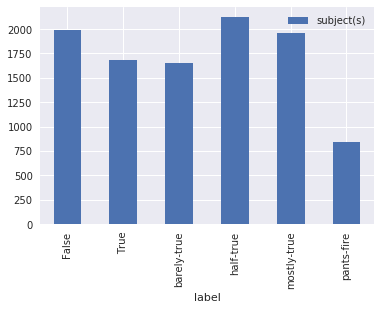

In [36]:
dfTwoCols= dfs_train[['label','subject(s)']]
dfTwoCols.groupby("label").count().plot(kind='bar')

In [37]:
dfTwoCols['verdict'] = dfTwoCols['label'].map({False: 0, True: 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols

/home/pratik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,label,subject(s),verdict
0,False,abortion,0
1,half-true,"energy,history,job-accomplishments",1
2,mostly-true,foreign-policy,1
3,False,health-care,0
4,half-true,"economy,jobs",1
5,True,education,1
6,barely-true,candidates-biography,0
7,half-true,ethics,1
8,half-true,jobs,1
9,mostly-true,"energy,message-machine-2014,voting-record",1


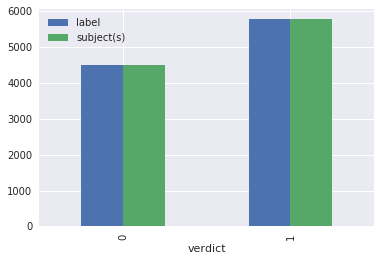

In [38]:
dfTwoCols.groupby("verdict").count().plot(kind='bar')

In [39]:
ct1=pd.crosstab(dfTwoCols["subject(s)"],dfTwoCols["verdict"],margins=True)
ct1.sort_values('All', ascending=False)

verdict,0,1,All
subject(s),,,
All,4493,5770,10263
health-care,197,184,381
taxes,124,184,308
immigration,120,133,253
elections,114,138,252
education,77,161,238
candidates-biography,98,92,190
economy,51,87,138
guns,47,83,130


Here we can see especially in the exceptional case of candidates-biography, social security that there is more false news than true.
Now that we have some information we can proceed find more information by processing the text to find unique values in subjects. Also by visualization we can observe that sensational news will have extremely polarised graphs.
Applying data preprocessing for NLP processing like tokeninsing, stemming etc

In [40]:
#print(bow_corpus)
class_train=np.array(dfTwoCols["verdict"])
print(class_train)
class_train=class_train.reshape(-1,1)
print(class_train)

pipeline.fit(dfs_train['statement'],class_train)

[0 1 1 ... 1 0 0]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


/home/pratik/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function preprocess at 0x7eff4e5006a8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [41]:
#test
dfs_test = pd.read_excel("/home/pratik/Desktop/ML_homework/test.xlsx")
msg_test=dfs_test["statement"]
dfTwoCols_test= dfs_test[['label','subject(s)']]
dfTwoCols_test['verdict'] = dfTwoCols_test['label'].map({False: 0, True: 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols_test
class_test=np.array(dfTwoCols_test["verdict"])
print(class_test)
class_test=class_test.reshape(-1,1)
print(class_test)
predictions = pipeline.predict(msg_test)

/home/pratik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


[1 0 0 ... 0 0 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [42]:
print(classification_report(class_test,predictions))

             precision    recall  f1-score   support

          0       0.61      0.30      0.40       556
          1       0.61      0.85      0.71       727

avg / total       0.61      0.61      0.58      1283



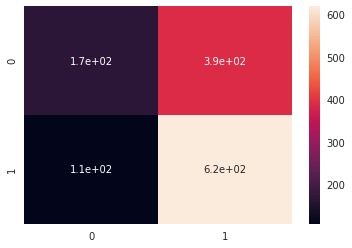

In [43]:
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)
# references: https://www.kaggle.com/astandrik/simple-spam-filter-using-naive-bayes

In [44]:
#sentiment analysis data enrichment
#sentiment analysis data enrichment
#https://blog.lftechnology.com/predicting-sentiment-on-news-data-45c5c22ec2e3

In [45]:
data_sentiment = pd.read_excel('/home/pratik/Desktop/ML_homework/uci-news-aggregator.xlsx')

In [46]:
data_sentiment

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
5,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212
6,7,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-...,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405
7,8,Fed's Plosser expects US unemployment to fall ...,http://www.fxstreet.com/news/forex-news/articl...,FXstreet.com,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.fxstreet.com,1394470372615
8,9,US jobs growth last month hit by weather:Fed P...,http://economictimes.indiatimes.com/news/inter...,Economic Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,economictimes.indiatimes.com,1394470372792
9,10,ECB unlikely to end sterilisation of SMP purch...,http://www.iii.co.uk/news-opinion/reuters/news...,Interactive Investor,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.iii.co.uk,1394470501265


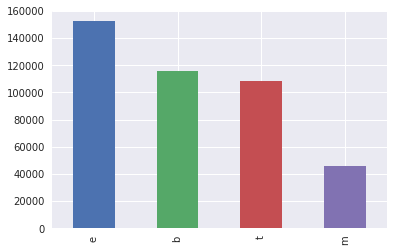

In [47]:

data_sentiment['CATEGORY'].value_counts().plot(kind="bar")
plt.show()

# train/test data split
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_sentiment, test_size=0.2)

In [48]:
sample_train_data = ['Dispute delays National Assembly formation process',
              'Country is looking to encourage entrepreneurs and startup process',
              'Airline fuel surcharges to go up from Tuesday'] 

#from sklearn.feature_extraction.text import CountVectorizer
# instantiate Vectorizer
vec = CountVectorizer()

# feed/learn the 'vocabulary' of the training data
vec.fit(sample_train_data)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [49]:
from sklearn.feature_extraction.text import HashingVectorizer


In [50]:
# create the transform

vectorizer = HashingVectorizer(n_features=5)

In [51]:
# encode document

vector = vectorizer.transform(dfs_train['statement'].values)

In [52]:
# summarize encoded vector

print(vector.shape)

print(vector.toarray())

(10269, 5)
[[-0.35355339 -0.35355339  0.35355339 -0.70710678 -0.35355339]
 [-0.83205029  0.2773501   0.2773501  -0.2773501   0.2773501 ]
 [-0.22941573  0.45883147 -0.45883147 -0.6882472  -0.22941573]
 ...
 [-0.2773501   0.5547002  -0.5547002  -0.5547002   0.        ]
 [-0.23570226  0.         -0.47140452 -0.70710678  0.47140452]
 [-0.46816459  0.70224688 -0.11704115  0.23408229 -0.46816459]]
